# E-Commerce Revenue Prediction System

Machine learning project that predicts whether an online shopping visitor will make a purchase (Revenue = TRUE/FALSE) using a k-nearest neighbors classifier. Built with Python and scikit-learn, it processes visitor session data and outputs purchase predictions with performance metrics.

# Problem
E-commerce platforms need to quickly understand which visitors are most likely to make a purchase. Accurately predicting purchase intent from real-time session behavior enables smarter decisions across the business, including:

- Targeted and efficient marketing
- Personalized on-site experiences
- Higher conversion through optimized user flows
- Better allocation of operational and advertising resources

This project builds a model that identifies high-intent shoppers based on their browsing patterns, helping e-commerce teams act proactively rather than reactively.

# Data
The dataset consists of 12,332 e-commerce visitor sessions, each represented as a single row. It includes 17 behavioral and contextual features and a binary target variable (Revenue) indicating whether the session resulted in a purchase.

Dataset provided by Sakar, C.O., Polat, S.O., Katircioglu, M. et al., Neural Comput & Applic (2018).

# Evaluation
The model is evaluated using metrics that highlight its ability to correctly identify both purchasing and non-purchasing visitors:

- Sensitivity (True Positive Rate): proportion of actual purchasers correctly identified
- Specificity (True Negative Rate): proportion of non-purchasers correctly identified
- Correct/Incorrect counts: overall accuracy breakdown
Includes division-by-zero handling for edge cases.

# Model

This project uses a K-Nearest Neighbors (KNN) classifier (KNeighborsClassifier) to predict purchase intent. The model is instance-based and non-parametric, relying on stored training examples rather than learning explicit parameters. With a default setting of k = 3 (configurable), predictions are made by examining the nearest neighbors in feature space.

In [ ]:
import csv
import sys
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

TEST_SIZE = 0.3

In [45]:
df = pd.read_csv("shopping_data.csv")
print("Dataset loaded successfully!")
df.head(5)

Dataset loaded successfully!


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


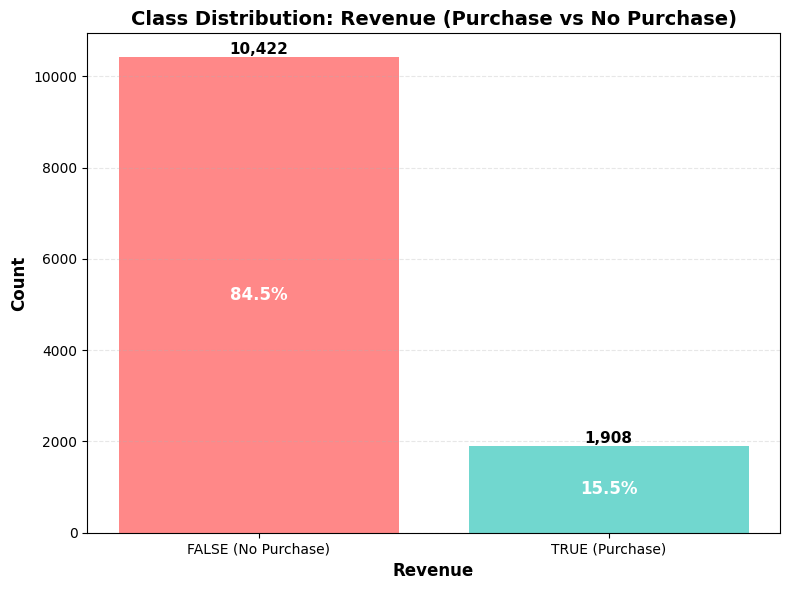


Class Distribution Summary:
FALSE (No Purchase): 10,422 (84.53%)
TRUE (Purchase): 1,908 (15.47%)


In [46]:
# Class distribution - Bar chart of Revenue (TRUE/FALSE)
revenue_counts = df['Revenue'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(revenue_counts.index, revenue_counts.values, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
plt.xlabel('Revenue', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Class Distribution: Revenue (Purchase vs No Purchase)', fontsize=14, fontweight='bold')
plt.xticks(revenue_counts.index, labels=['FALSE (No Purchase)', 'TRUE (Purchase)'])

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add percentage labels
total = revenue_counts.sum()
for i, (idx, count) in enumerate(revenue_counts.items()):
    percentage = (count / total) * 100
    plt.text(i, count/2, f'{percentage:.1f}%',
             ha='center', va='center', fontsize=12, fontweight='bold', color='white')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"\nClass Distribution Summary:")
print(f"FALSE (No Purchase): {revenue_counts.get(False, 0):,} ({(revenue_counts.get(False, 0)/total*100):.2f}%)")
print(f"TRUE (Purchase): {revenue_counts.get(True, 0):,} ({(revenue_counts.get(True, 0)/total*100):.2f}%)")


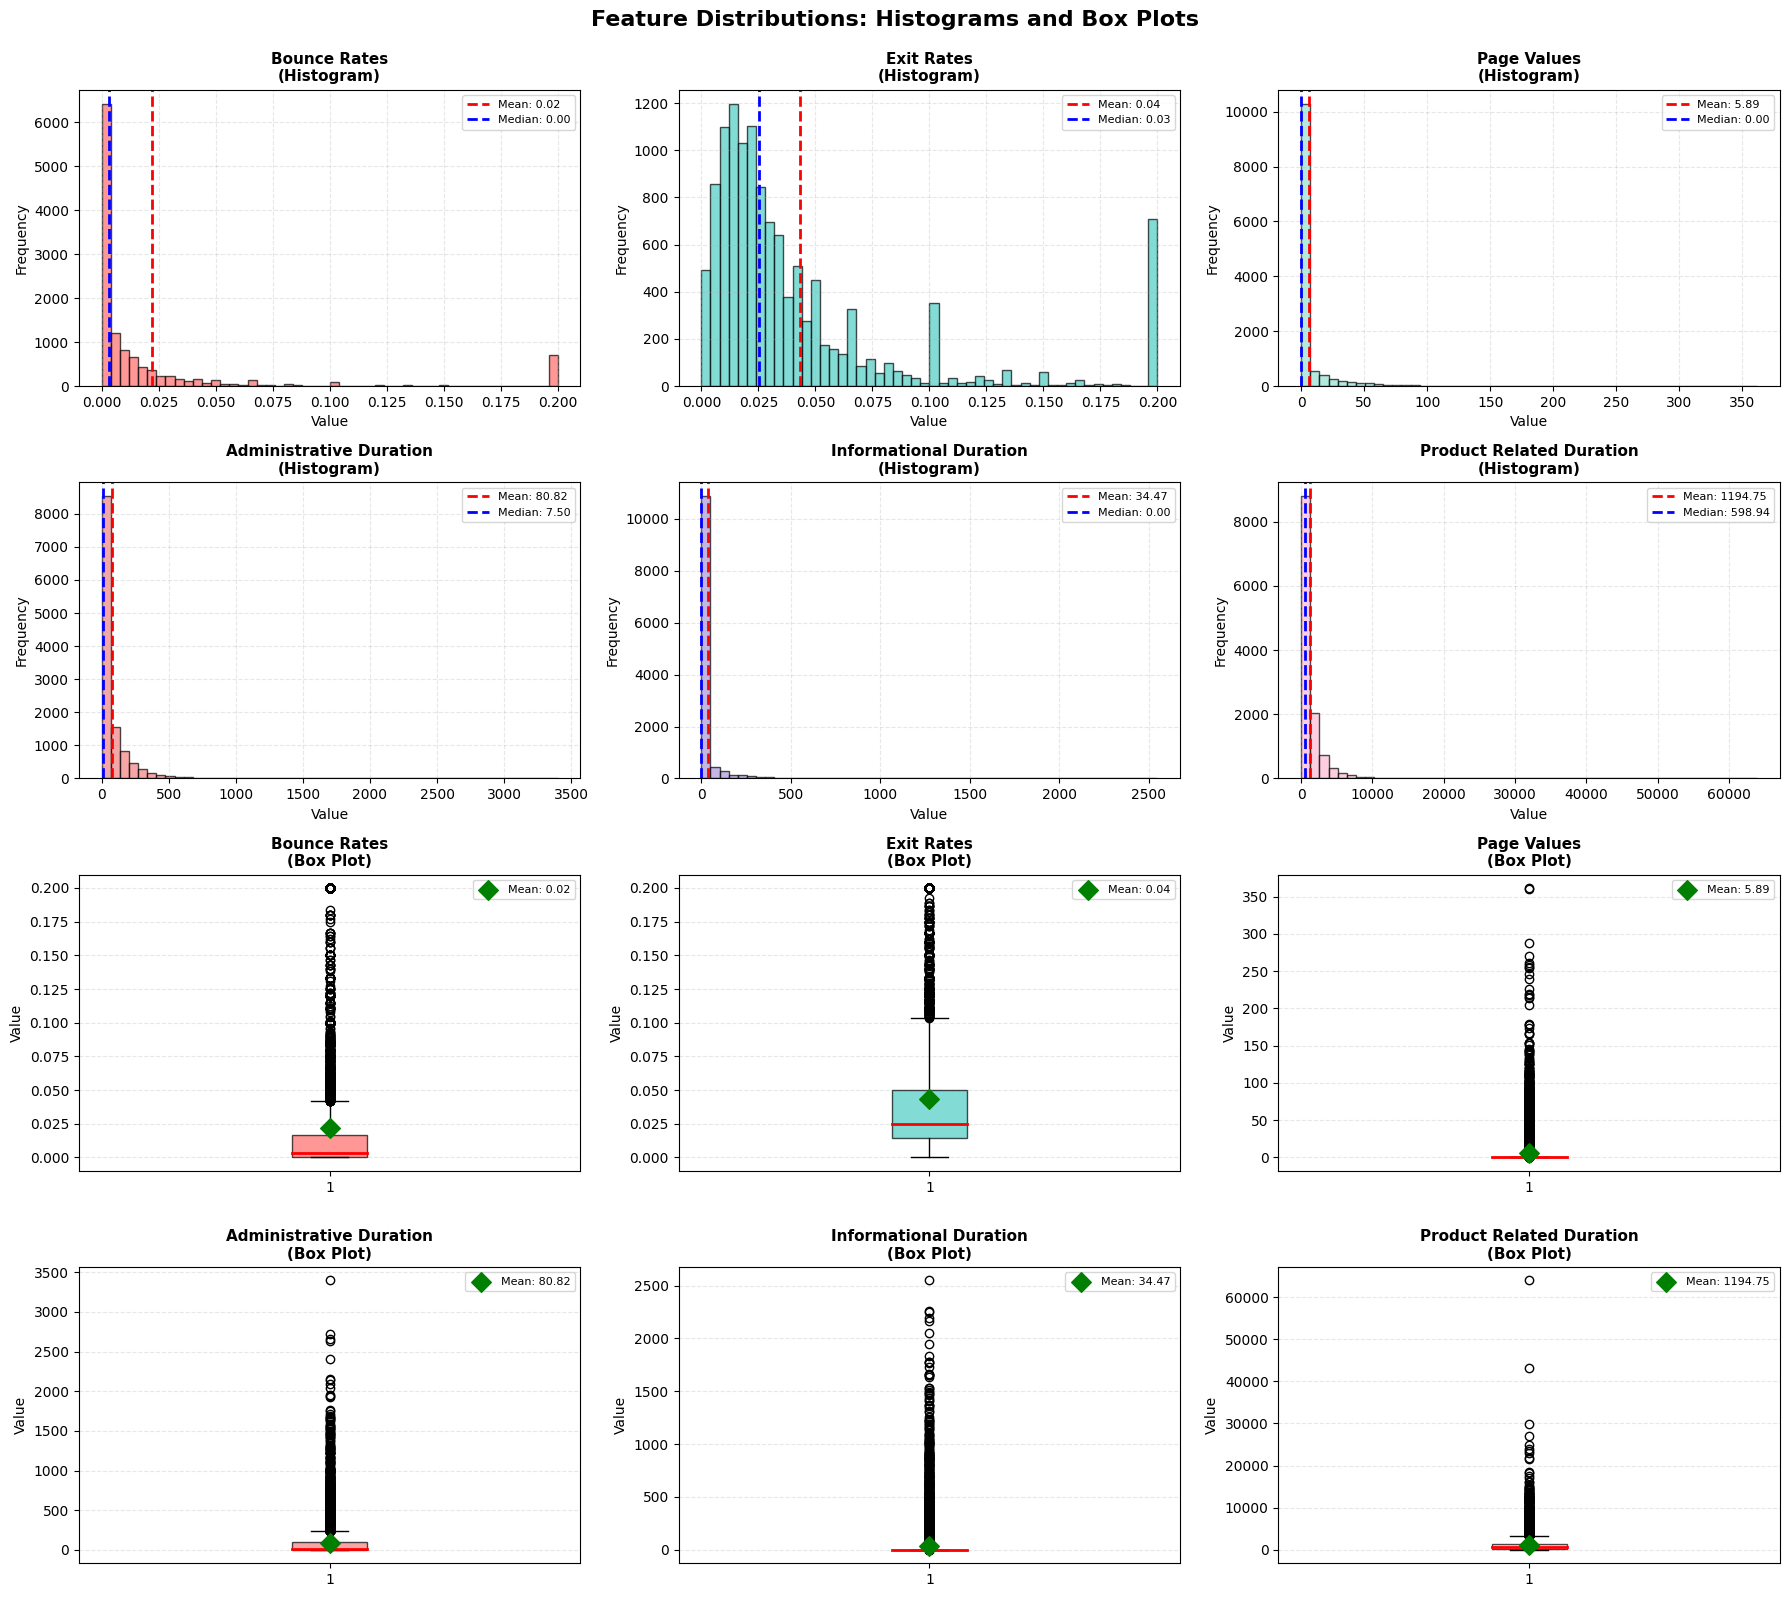


FEATURE DISTRIBUTION SUMMARY STATISTICS

Bounce Rates:
  Mean:   0.0222
  Median: 0.0031
  Std:    0.0485
  Min:    0.0000
  Max:    0.2000
  Q1:     0.0000
  Q3:     0.0168

Exit Rates:
  Mean:   0.0431
  Median: 0.0252
  Std:    0.0486
  Min:    0.0000
  Max:    0.2000
  Q1:     0.0143
  Q3:     0.0500

Page Values:
  Mean:   5.8893
  Median: 0.0000
  Std:    18.5684
  Min:    0.0000
  Max:    361.7637
  Q1:     0.0000
  Q3:     0.0000

Administrative Duration:
  Mean:   80.8186
  Median: 7.5000
  Std:    176.7791
  Min:    0.0000
  Max:    3398.7500
  Q1:     0.0000
  Q3:     93.2562

Informational Duration:
  Mean:   34.4724
  Median: 0.0000
  Std:    140.7493
  Min:    0.0000
  Max:    2549.3750
  Q1:     0.0000
  Q3:     0.0000

Product Related Duration:
  Mean:   1194.7462
  Median: 598.9369
  Std:    1913.6693
  Min:    0.0000
  Max:    63973.5222
  Q1:     184.1375
  Q3:     1464.1572


In [47]:
# Feature distributions - Histograms and box plots for numeric features
features_to_plot = {
    'BounceRates': 'Bounce Rates',
    'ExitRates': 'Exit Rates',
    'PageValues': 'Page Values',
    'Administrative_Duration': 'Administrative Duration',
    'Informational_Duration': 'Informational Duration',
    'ProductRelated_Duration': 'Product Related Duration'
}

# Creates figure with subplots: 2 rows x 3 columns for histograms, then box plots
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Feature Distributions: Histograms and Box Plots', fontsize=16, fontweight='bold', y=0.995)

# Define colors for each feature
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#AA96DA', '#FCBAD3']

# Plot histograms (first 2 rows)
for idx, (col, label) in enumerate(features_to_plot.items()):
    row = idx // 3
    col_idx = idx % 3
    
    # Histogram
    axes[row, col_idx].hist(df[col], bins=50, color=colors[idx], alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'{label}\n(Histogram)', fontsize=11, fontweight='bold')
    axes[row, col_idx].set_xlabel('Value', fontsize=10)
    axes[row, col_idx].set_ylabel('Frequency', fontsize=10)
    axes[row, col_idx].grid(alpha=0.3, linestyle='--')
    
    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row, col_idx].axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[row, col_idx].legend(fontsize=8)

# Plot box plots (last 2 rows)
for idx, (col, label) in enumerate(features_to_plot.items()):
    row = (idx // 3) + 2
    col_idx = idx % 3
    
    # Box plot
    bp = axes[row, col_idx].boxplot(df[col], patch_artist=True, 
                                     boxprops=dict(facecolor=colors[idx], alpha=0.7),
                                     medianprops=dict(color='red', linewidth=2))
    axes[row, col_idx].set_title(f'{label}\n(Box Plot)', fontsize=11, fontweight='bold')
    axes[row, col_idx].set_ylabel('Value', fontsize=10)
    axes[row, col_idx].grid(alpha=0.3, linestyle='--', axis='y')
    
    # Add mean marker
    mean_val = df[col].mean()
    axes[row, col_idx].scatter([1], [mean_val], color='green', s=100, marker='D', 
                                zorder=3, label=f'Mean: {mean_val:.2f}')
    axes[row, col_idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("FEATURE DISTRIBUTION SUMMARY STATISTICS")
print("="*80)
for col, label in features_to_plot.items():
    print(f"\n{label}:")
    print(f"  Mean:   {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Std:    {df[col].std():.4f}")
    print(f"  Min:    {df[col].min():.4f}")
    print(f"  Max:    {df[col].max():.4f}")
    print(f"  Q1:     {df[col].quantile(0.25):.4f}")
    print(f"  Q3:     {df[col].quantile(0.75):.4f}")


In [48]:
# Load data from spreadsheet and split into train and test sets using pandas
def load_data(file):
    # Load CSV into pandas DataFrame
    df = pd.read_csv(file)
    df.head(5)
    
    # Month to index mapping
    month_to_index = {
        "Jan": 0, "Feb": 1, "Mar": 2, "Apr": 3, "May": 4, "June": 5,
        "Jul": 6, "Aug": 7, "Sep": 8, "Oct": 9, "Nov": 10, "Dec": 11
    }
    
    # Convert Month to index
    df['Month'] = df['Month'].map(month_to_index)
    
    # Convert boolean strings to integers
    df['VisitorType'] = (df['VisitorType'] == 'Returning_Visitor').astype(int)
    df['Weekend'] = (df['Weekend'] == 'True').astype(int)
    df['Revenue'] = (df['Revenue'] == 'True').astype(int)
    
    # Define evidence columns in the desired order
    evidence_columns = [
        'Administrative',
        'Administrative_Duration',
        'Informational',
        'Informational_Duration',
        'ProductRelated',
        'ProductRelated_Duration',
        'BounceRates',
        'ExitRates',
        'PageValues',
        'SpecialDay',
        'Month',
        'OperatingSystems',
        'Browser',
        'Region',
        'TrafficType',
        'VisitorType',
        'Weekend'
    ]
    
    # Extract evidence and labels
    evidence = df[evidence_columns].values.tolist()
    labels = df['Revenue'].values.tolist()
    
    return (evidence, labels)

evidence, labels = load_data("shopping_data.csv")


print(f"Evidence: {evidence[0]}")
print(f"Labels: {labels[0]}")



Evidence: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.2, 0.2, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
Labels: 0


In [49]:
# Split into train and test sets
    
X_train, X_test, Y_train, Y_test = train_test_split(
    evidence, labels, test_size=TEST_SIZE
)

In [50]:
# Train model and make predictions
def train_model(X_train, Y_train):
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, Y_train)
    return model

model = train_model(X_train, Y_train)

In [51]:
# Make predictions on test data
predictions = model.predict(X_test)

In [52]:
# Evaluate model performance
def evaluate(labels, predictions):
    true_positives = 0  # Accurate true predictions (1 predicted as 1)
    false_positives = 0  # Inaccurate true predictions (0 predicted as 1)
    true_negatives = 0  # Accurate false predictions (0 predicted as 0)
    false_negatives = 0  # Inaccurate false predictions (1 predicted as 0)

    # Check if labels and predictions are the same length
    if len(labels) != len(predictions):
        raise ValueError("Labels and predictions must be the same length")

    for i in range(len(labels)):
        if labels[i] == 1 and predictions[i] == 1:
            true_positives += 1
        elif labels[i] == 0 and predictions[i] == 1:
            false_positives += 1
        elif labels[i] == 0 and predictions[i] == 0:
            true_negatives += 1
        elif labels[i] == 1 and predictions[i] == 0:
            false_negatives += 1

    # Calculate sensitivity and specificity, guarding against zero denominators
    actual_positives = true_positives + false_negatives
    actual_negatives = true_negatives + false_positives

    if actual_positives != 0:
        sensitivity = true_positives / actual_positives
    else:
        sensitivity = 0.0

    if actual_negatives != 0:
        specificity = true_negatives / actual_negatives
    else:
        specificity = 0.0

    return (sensitivity, specificity)

sensitivity, specificity = evaluate(Y_test, predictions)

# Print results
print(f"Correct: {(Y_test == predictions).sum()}")
print(f"Incorrect: {(Y_test != predictions).sum()}")
print(f"True Positive Rate: {100 * sensitivity:.2f}%")
print(f"True Negative Rate: {100 * specificity:.2f}%")


Correct: 3699
Incorrect: 0
True Positive Rate: 0.00%
True Negative Rate: 100.00%
